Arlington, Virginia has this great Bikeometer on the Custis Trail in Rosslyn. This tall digital sign always catches my attention when I ride by it. It displays the number of bicycles that pass that sign daily, monthly and year to date. I discovered that this data is also available online. I decided to use my Python skills to import this data, clean it up, and do some basic analysis.<!-- TEASER_END -->

Accoring to Arlington's website, the Rosslyn Bikeometer, the first Eco-Totem on the east coast, launched April 1, 2014. Westbound Lee Highway near N Lynn Street, Rosslyn. Bicycle-only detection and display is in real time with direction detection, four pavement loops.  You can find out more about it at http://www.bikearlington.com/pages/biking-in-arlington/counting-bikes-to-plan-for-bikes/about-the-counters/.

My first step in this project was to start this Python 3.5 Jupyter Notebook.  Then I import the libraries I plan to use for this project. They are as follows:

In [1]:
import pandas as pd
import requests
from xml.etree import ElementTree
import numpy as np

In [2]:
url = "http://webservices.commuterpage.com/counters.cfc?wsdl&method=GetCountInDateRange&counterid=28&startDate=04/01/2014&endDate=01/01/2017&direction=I&mode=B&interval=d"
xmlfile = open('xml_data.xml', 'w')
xmldata = requests.get(url)
xmlfile.write(xmldata.text)
xmlfile.close()
print(xmldata.text)

xml_data = 'xml_data.xml'

<?xml version="1.0" encoding="UTF-8"?>
<counts counter="28" endDate="1/1/2017" startDate="4/1/2014"> 
		<count count="710" date="04/01/2014" direction="I" mode="B"/>
		
		<count count="688" date="04/02/2014" direction="I" mode="B"/>
		
		<count count="514" date="04/03/2014" direction="I" mode="B"/>
		
		<count count="424" date="04/04/2014" direction="I" mode="B"/>
		
		<count count="474" date="04/05/2014" direction="I" mode="B"/>
		
		<count count="553" date="04/06/2014" direction="I" mode="B"/>
		
		<count count="165" date="04/07/2014" direction="I" mode="B"/>
		
		<count count="560" date="04/08/2014" direction="I" mode="B"/>
		
		<count count="653" date="04/09/2014" direction="I" mode="B"/>
		
		<count count="809" date="04/10/2014" direction="I" mode="B"/>
		
		<count count="627" date="04/11/2014" direction="I" mode="B"/>
		
		<count count="973" date="04/12/2014" direction="I" mode="B"/>
		
		<count count="926" date="04/13/2014" direction="I" mode="B"/>
		
		<count count="675" date="

I took the XML data file and parsed it with ElementTree.

In [3]:
document = ElementTree.parse(xml_data)

In [4]:
document

In [5]:
cnt = document.find('count')

In [6]:
cnt.attrib['count']
cnt.attrib['date']
cnt.attrib['direction']

'I'

In [7]:
date = []
count = []
for day in document.findall('count'):
    date.append(day.attrib['date'])
    count.append(day.attrib['count'])
dfbikes = pd.DataFrame({'date' : date, 'count': count})
dfbikes['date'] = pd.to_datetime(dfbikes.date)
dfbikes

,count,date
0,710,2014-04-01
1,688,2014-04-02
2,514,2014-04-03
3,424,2014-04-04
4,474,2014-04-05
5,553,2014-04-06
6,165,2014-04-07
7,560,2014-04-08
8,653,2014-04-09
9,809,2014-04-10


In [8]:
dfbikes = dfbikes.set_index("date")
dfbikes

,count
date,
2014-04-01,710
2014-04-02,688
2014-04-03,514
2014-04-04,424
2014-04-05,474
2014-04-06,553
2014-04-07,165
2014-04-08,560
2014-04-09,653


## Adding in Weather Data

API Documentation: http://www.bikearlington.com/tasks/sites/bike/assets/File/Regional_bikearlington_webservices.pdf
Source: http://webservices.commuterpage.com/weatherdata.cfc?wsdl&method=GetCodes

```xml
<weather_codes>
<code name="dewpoint" binary="No" cumulative="No" units="°F"/>
<code name="fog" binary="Yes" cumulative="No" units=""/>
<code name="hail" binary="Yes" cumulative="No" units=""/>
<code name="rain" binary="Yes" cumulative="No" units=""/>
<code name="snow" binary="Yes" cumulative="No" units=""/>
<code name="thunder" binary="Yes" cumulative="No" units=""/>
<code name="tornado" binary="Yes" cumulative="No" units=""/>
<code name="humidity" binary="No" cumulative="No" units="%"/>
<code name="pressure" binary="No" cumulative="No" units="inHg"/>
<code name="temperature" binary="No" cumulative="No" units="°F"/>
<code name="visibility" binary="No" cumulative="No" units="miles"/>
<code name="windspeed" binary="No" cumulative="No" units="mph"/>
<code name="precipitation" binary="No" cumulative="Yes" units="inches"/>
</weather_codes>

```


Description: Returns the weather data based on the requested weather code and the
date.
Request Fields:
• dates: string value, required field. Is a range of dates to retrieve the weather
data, acceptable format yyyymmdd-yyyymmdd
• code: string value, required field. Supply the available weather codes from the
getcodes response.
• function: string value, optional. Function to perform on the data (avg, sum, min,
max); defaults to avg.
• hours: string value, optional. Hours in 24-hour format (0-23); may be commadelimited
list, hyphen-separated range, or special keywords "all" or "daytime"
• dayLimiter: numeric value, optional. Day of the week. Sun to Sat – 1 to 7
respectively, weekends – 8, sat & sun – 9, All - 0. Defaults to All - 0.
Example:
http://webservices.commuterpage.com/weatherdata.cfc?wsdl&method=GetData&dates=20110301-20110305&code=temperature

In [9]:
weatherapi_url = "http://webservices.commuterpage.com/weatherdata.cfc?wsdl&method=GetData&dates=20140401-20170101&code=temperature"

In [10]:
xmlfile = open('xml_temps.xml', 'w')
xmldata = requests.get(weatherapi_url)
xmlfile.write(xmldata.text)
xmlfile.close()
print(xmldata.text)

xml_temps = 'xml_temps.xml'


			<weather_data dates="20140401-20170101" hours="all" sample_frequency="all">
				<dataset>
		
					<date value="20150101">
					
						<data mode="calculated" function="avg" code="temperature" value="36.6" units="&#xb0;F" />
					
					</date>
		
					<date value="20160101">
					
						<data mode="calculated" function="avg" code="temperature" value="41.9" units="&#xb0;F" />
					
					</date>
		
					<date value="20170101">
					
						<data mode="calculated" function="avg" code="temperature" value="46.3" units="&#xb0;F" />
					
					</date>
		
					<date value="20150102">
					
						<data mode="calculated" function="avg" code="temperature" value="41.4" units="&#xb0;F" />
					
					</date>
		
					<date value="20160102">
					
						<data mode="calculated" function="avg" code="temperature" value="40.2" units="&#xb0;F" />
					
					</date>
		
					<date value="20150103">
					
						<data mode="calculated" function="avg" code="temperature" value="40.3" units="&#xb0;F" />
					
	

In [11]:
document = ElementTree.parse(xml_temps)
date = []
temp = []
document.findall('dataset/date')

[<Element 'date' at 0x00000000093C9778>,
 <Element 'date' at 0x00000000093C98B8>,
 <Element 'date' at 0x00000000093C99A8>,
 <Element 'date' at 0x00000000093C9A98>,
 <Element 'date' at 0x00000000093C9B88>,
 <Element 'date' at 0x00000000093C9C78>,
 <Element 'date' at 0x00000000093C9D68>,
 <Element 'date' at 0x00000000093C9E58>,
 <Element 'date' at 0x00000000093C9F48>,
 <Element 'date' at 0x00000000093D1098>,
 <Element 'date' at 0x00000000093D1188>,
 <Element 'date' at 0x00000000093D1278>,
 <Element 'date' at 0x00000000093D1368>,
 <Element 'date' at 0x00000000093D1458>,
 <Element 'date' at 0x00000000093D1548>,
 <Element 'date' at 0x00000000093D1638>,
 <Element 'date' at 0x00000000093D1728>,
 <Element 'date' at 0x00000000093D1818>,
 <Element 'date' at 0x00000000093D1908>,
 <Element 'date' at 0x00000000093D19F8>,
 <Element 'date' at 0x00000000093D1AE8>,
 <Element 'date' at 0x00000000093D1BD8>,
 <Element 'date' at 0x00000000093D1CC8>,
 <Element 'date' at 0x00000000093D1DB8>,
 <Element 'date'

In [12]:
for day in document.findall('dataset/date'):
    date.append(day.attrib['value'])
for day in document.findall('dataset/date/data'):
    temp.append(day.attrib['value'])
dftemperature = pd.DataFrame({'date' : date, 'temperature' : temp})
dftemperature['date'] = pd.to_datetime(dftemperature.date)
dftemperature = dftemperature.set_index("date")
dftemperature

,temperature
date,
2015-01-01,36.6
2016-01-01,41.9
2017-01-01,46.3
2015-01-02,41.4
2016-01-02,40.2
2015-01-03,40.3
2016-01-03,40.1
2015-01-04,53.3
2016-01-04,33.5


In [13]:
pd.concat([dfbikes, dftemperature], axis=1)

,count,temperature
date,,
2014-04-01,710,54.0
2014-04-02,688,55.3
2014-04-03,514,59.8
2014-04-04,424,55.1
2014-04-05,474,53.0
2014-04-06,553,50.1
2014-04-07,165,51.0
2014-04-08,560,57.7
2014-04-09,653,57.3


# Add in wind and precipitation

In [14]:
weatherapi_url = "http://webservices.commuterpage.com/weatherdata.cfc?wsdl&method=GetData&dates=20140401-20170101&code=windspeed"

xmlfile = open('xml_wind.xml', 'w')
xmldata = requests.get(weatherapi_url)
xmlfile.write(xmldata.text)
xmlfile.close()
print(xmldata.text)

xml_wind = 'xml_wind.xml'


			<weather_data dates="20140401-20170101">
				<dataset>
		
			<date value="20140401">
			
				<data mode="summary" function="avg" code="windspeed" value="6" units="mph" />
			
			</date>
		
			<date value="20140402">
			
				<data mode="summary" function="avg" code="windspeed" value="3" units="mph" />
			
			</date>
		
			<date value="20140403">
			
				<data mode="summary" function="avg" code="windspeed" value="3" units="mph" />
			
			</date>
		
			<date value="20140404">
			
				<data mode="summary" function="avg" code="windspeed" value="7" units="mph" />
			
			</date>
		
			<date value="20140405">
			
				<data mode="summary" function="avg" code="windspeed" value="9" units="mph" />
			
			</date>
		
			<date value="20140406">
			
				<data mode="summary" function="avg" code="windspeed" value="6" units="mph" />
			
			</date>
		
			<date value="20140407">
			
				<data mode="summary" function="avg" code="windspeed" value="6" units="mph" />
			
			</date>
		
			<date value="20140

In [15]:
document = ElementTree.parse(xml_wind)
date = []
wind = []

document.findall('dataset/date')

[<Element 'date' at 0x00000000095B6188>,
 <Element 'date' at 0x00000000095B6908>,
 <Element 'date' at 0x00000000095B69A8>,
 <Element 'date' at 0x00000000095B6A48>,
 <Element 'date' at 0x00000000095B6AE8>,
 <Element 'date' at 0x00000000095B6B88>,
 <Element 'date' at 0x00000000095B6C28>,
 <Element 'date' at 0x00000000095B6CC8>,
 <Element 'date' at 0x00000000095B6D68>,
 <Element 'date' at 0x00000000095B6E08>,
 <Element 'date' at 0x00000000095B6EA8>,
 <Element 'date' at 0x00000000095B6F48>,
 <Element 'date' at 0x00000000095BD048>,
 <Element 'date' at 0x00000000095BD0E8>,
 <Element 'date' at 0x00000000095BD188>,
 <Element 'date' at 0x00000000095BD228>,
 <Element 'date' at 0x00000000095BD2C8>,
 <Element 'date' at 0x00000000095BD368>,
 <Element 'date' at 0x00000000095BD408>,
 <Element 'date' at 0x00000000095BD4A8>,
 <Element 'date' at 0x00000000095BD548>,
 <Element 'date' at 0x00000000095BD5E8>,
 <Element 'date' at 0x00000000095BD688>,
 <Element 'date' at 0x00000000095BD728>,
 <Element 'date'

In [16]:
for day in document.findall('dataset/date'):
    date.append(day.attrib['value'])
for day in document.findall('dataset/date/data'):
    wind.append(day.attrib['value'])
dfwind = pd.DataFrame({'date' : date, 'windspeed' : wind})
dfwind['date'] = pd.to_datetime(dfwind.date)
dfwind = dfwind.set_index("date")
dfwind

,windspeed
date,
2014-04-01,6
2014-04-02,3
2014-04-03,3
2014-04-04,7
2014-04-05,9
2014-04-06,6
2014-04-07,6
2014-04-08,7
2014-04-09,7


In [17]:
weatherapi_url = "http://webservices.commuterpage.com/weatherdata.cfc?wsdl&method=GetData&dates=20140401-20170101&code=precipitation"

xmlfile = open('xml_precip.xml', 'w')
xmldata = requests.get(weatherapi_url)
xmlfile.write(xmldata.text)
xmlfile.close()
print(xmldata.text)

xml_precip = 'xml_precip.xml'


			<weather_data dates="20140401-20170101">
				<dataset>
		
			<date value="20140401">
			
				<data mode="summary" code="precipitation" value="0.00" units="inches" />
			
			</date>
		
			<date value="20140402">
			
				<data mode="summary" code="precipitation" value="0.00" units="inches" />
			
			</date>
		
			<date value="20140403">
			
				<data mode="summary" code="precipitation" value="T" units="inches" />
			
			</date>
		
			<date value="20140404">
			
				<data mode="summary" code="precipitation" value="0.06" units="inches" />
			
			</date>
		
			<date value="20140405">
			
				<data mode="summary" code="precipitation" value="0.01" units="inches" />
			
			</date>
		
			<date value="20140406">
			
				<data mode="summary" code="precipitation" value="0.00" units="inches" />
			
			</date>
		
			<date value="20140407">
			
				<data mode="summary" code="precipitation" value="0.38" units="inches" />
			
			</date>
		
			<date value="20140408">
			
				<data mode="summary" cod

In [18]:
document = ElementTree.parse(xml_precip)
date = []
precip = []

document.findall('dataset/date')

[<Element 'date' at 0x00000000096E7E58>,
 <Element 'date' at 0x00000000093C9048>,
 <Element 'date' at 0x00000000093C97C8>,
 <Element 'date' at 0x00000000095A2D18>,
 <Element 'date' at 0x0000000009186688>,
 <Element 'date' at 0x00000000096F4368>,
 <Element 'date' at 0x00000000096F4958>,
 <Element 'date' at 0x00000000096F44A8>,
 <Element 'date' at 0x00000000096F4818>,
 <Element 'date' at 0x00000000096F4728>,
 <Element 'date' at 0x00000000096F48B8>,
 <Element 'date' at 0x00000000096F4868>,
 <Element 'date' at 0x00000000096F4278>,
 <Element 'date' at 0x00000000096F43B8>,
 <Element 'date' at 0x00000000096F4598>,
 <Element 'date' at 0x00000000096F4A48>,
 <Element 'date' at 0x00000000096F4AE8>,
 <Element 'date' at 0x00000000096F4B88>,
 <Element 'date' at 0x00000000096F4C28>,
 <Element 'date' at 0x00000000096F4CC8>,
 <Element 'date' at 0x00000000096F4D68>,
 <Element 'date' at 0x00000000096F4E08>,
 <Element 'date' at 0x00000000096F4EA8>,
 <Element 'date' at 0x00000000096F4F48>,
 <Element 'date'

In [19]:
for day in document.findall('dataset/date'):
    date.append(day.attrib['value'])
for day in document.findall('dataset/date/data'):
    if day.attrib['value'] != 'T':
        precip.append(day.attrib['value'])
    else:
        precip.append(0.0)
dfprecip = pd.DataFrame({'date' : date, 'precipitation' : precip})
dfprecip['date'] = pd.to_datetime(dfprecip.date)
dfprecip = dfprecip.set_index("date")
dfprecip

,precipitation
date,
2014-04-01,0.00
2014-04-02,0.00
2014-04-03,0
2014-04-04,0.06
2014-04-05,0.01
2014-04-06,0.00
2014-04-07,0.38
2014-04-08,0.04
2014-04-09,0.00


In [20]:
bikedataframe = pd.concat([dfbikes, dftemperature, dfwind, dfprecip], axis=1)
bikedataframe.head()

,count,temperature,windspeed,precipitation
date,,,,
2014-04-01,710,54.0,6,0.00
2014-04-02,688,55.3,3,0.00
2014-04-03,514,59.8,3,0
2014-04-04,424,55.1,7,0.06
2014-04-05,474,53.0,9,0.01


In [21]:
bikedataframe.index[0].weekday_name

'Tuesday'

In [22]:
bikedataframe["dayofweek"] = bikedataframe.index.dayofweek

In [23]:
bikedataframe = bikedataframe.astype(float)
bikedataframe["weekday"] = 0
bikedataframe['weekday'] = np.where(bikedataframe['dayofweek'] < 5, 1, 0)
bikedataframe.head(14)

,count,temperature,windspeed,precipitation,dayofweek,weekday
date,,,,,,
2014-04-01,710.0,54.0,6.0,0.00,1.0,1
2014-04-02,688.0,55.3,3.0,0.00,2.0,1
2014-04-03,514.0,59.8,3.0,0.00,3.0,1
2014-04-04,424.0,55.1,7.0,0.06,4.0,1
2014-04-05,474.0,53.0,9.0,0.01,5.0,0
2014-04-06,553.0,50.1,6.0,0.00,6.0,0
2014-04-07,165.0,51.0,6.0,0.38,0.0,1
2014-04-08,560.0,57.7,7.0,0.04,1.0,1
2014-04-09,653.0,57.3,7.0,0.00,2.0,1


In [24]:
bikedataframe.mean()

count            426.203980
temperature       61.207562
windspeed          7.176471
precipitation      0.112159
dayofweek          3.002979
weekday            0.714002
dtype: float64

In [25]:
bikedataframe.groupby('dayofweek').mean()

,count,temperature,windspeed,precipitation,weekday
dayofweek,,,,,
0.0,469.552448,61.428671,7.226950,0.126667,1
1.0,478.187500,62.140278,7.062500,0.169097,1
2.0,473.333333,61.881119,6.832168,0.139792,1
3.0,442.118881,61.536364,7.132867,0.105347,1
4.0,426.629371,60.450694,7.625000,0.070764,1
5.0,325.013889,60.023611,7.256944,0.121736,0
6.0,369.006944,61.000694,7.097222,0.052014,0


In [26]:
week_versus_end = bikedataframe.groupby('weekday')
week_versus_end['count'].mean()

weekday
0    347.010417
1    458.013947
Name: count, dtype: float64

In [27]:
week_versus_end.min()

,count,temperature,windspeed,precipitation,dayofweek
weekday,,,,,
0,0.0,15.9,1.0,0.0,5.0
1,2.0,14.1,1.0,0.0,0.0


In [28]:
week_versus_end.max()

,count,temperature,windspeed,precipitation,dayofweek
weekday,,,,,
0,973.0,90.1,21.0,2.75,6.0
1,989.0,89.2,16.0,2.70,4.0


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

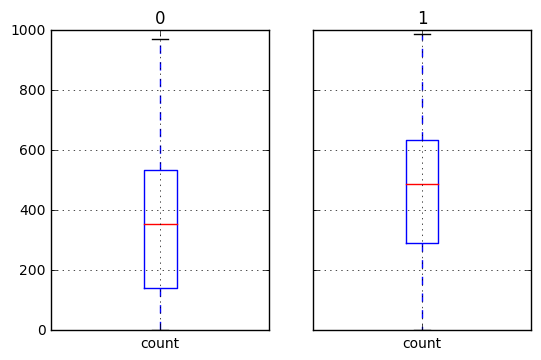

In [32]:
plt.figure()
bp = week_versus_end.boxplot(column = 'count', return_type='axes')